In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
# Loading Dataset
df=pd.read_csv('DataSights_Dataset.csv')

In [256]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [258]:
df.shape

(45528, 19)

In [259]:
df.isnull().mean()*100          # Null values

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
migrant_worker             0.191091
yearly_debt_payments       0.208663
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.017572
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64

### Few operations which needs to take are:-
- drop those rows having null values since they are very less
- convert datatypes of few columns like no_of_children,no_of_days_employed,total_family_members,migrant_worker into int
- Introducing new column loan_to_income_ratio and dropping net_yearly_income and yearly_debt_payments column

In [260]:
# dropping null value rows
df_cleaned=df.dropna()

In [261]:
df_cleaned.shape

(43509, 19)

In [262]:
df_cleaned.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [263]:
# Convert float to int
convert={'no_of_children':int,'no_of_days_employed':int,'total_family_members':int,'migrant_worker':int}
df_cleaned=df_cleaned.astype(convert)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43509 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              43509 non-null  object 
 1   name                     43509 non-null  object 
 2   age                      43509 non-null  int64  
 3   gender                   43509 non-null  object 
 4   owns_car                 43509 non-null  object 
 5   owns_house               43509 non-null  object 
 6   no_of_children           43509 non-null  int32  
 7   net_yearly_income        43509 non-null  float64
 8   no_of_days_employed      43509 non-null  int32  
 9   occupation_type          43509 non-null  object 
 10  total_family_members     43509 non-null  int32  
 11  migrant_worker           43509 non-null  int32  
 12  yearly_debt_payments     43509 non-null  float64
 13  credit_limit             43509 non-null  float64
 14  credit_limit_used(%)  

In [264]:
df_cleaned.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [265]:
df_cleaned.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,43509.000000,43509.000000,4.350900e+04,43509.000000,43509.000000,43509.000000,43509.000000,4.350900e+04,43509.000000,43509.000000,43509.000000,43509.000000,43509.000000
mean,38.997885,0.420947,2.008968e+05,67631.328438,2.159002,0.179641,31812.731181,4.360426e+04,52.235721,782.785332,0.060769,0.050748,0.081156
std,9.543480,0.724627,6.840522e+05,139341.558948,0.912460,0.383893,17274.938283,1.520773e+05,29.380952,100.585008,0.264391,0.219485,0.273077
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.000000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.262890e+05,937.000000,2.000000,0.000000,19238.220000,2.397718e+04,27.000000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.716450e+05,2224.000000,2.000000,0.000000,29105.130000,3.569072e+04,54.000000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.407659e+05,5812.000000,3.000000,0.000000,40577.850000,5.348147e+04,79.000000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.000000,949.000000,2.000000,1.000000,1.000000


### Visualising Outliers


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Before Removal of Outliers ')

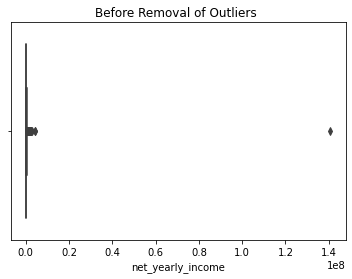

In [266]:
sns.boxplot(df_cleaned['net_yearly_income'])
plt.title("Before Removal of Outliers ")

In [269]:
# Saving values less than 2500000, to avoid affect of outliers
df_cleaned=df_cleaned[df_cleaned['net_yearly_income']<2.5e+06]

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Removal of Outliers')

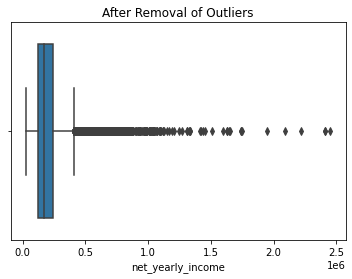

In [270]:
sns.boxplot(df_cleaned['net_yearly_income'])
plt.title("After Removal of Outliers")

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_days_employed'>

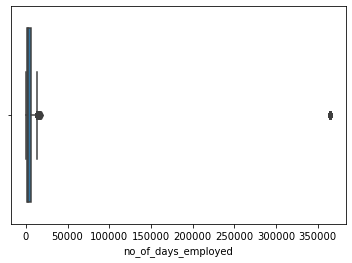

In [271]:

sns.boxplot(df_cleaned['no_of_days_employed'])


In [272]:
# Saving rows containing no of days employed less than 50000
df_cleaned=df_cleaned[df_cleaned['no_of_days_employed']<50000]

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Removal of Outliers')

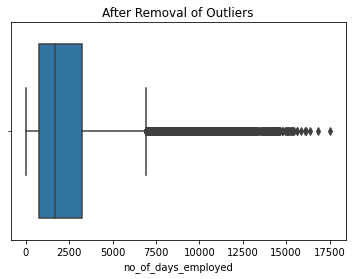

In [273]:
sns.boxplot(df_cleaned['no_of_days_employed'])
plt.title("After Removal of Outliers")


## Exploratory Data Analysis

<AxesSubplot:xlabel='credit_card_default', ylabel='age'>

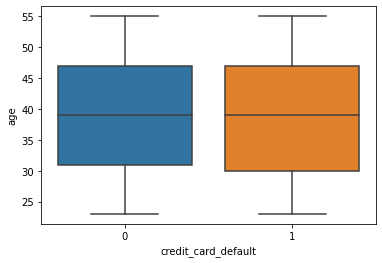

In [151]:
# Credit card default with Age
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['age'])

### - There is no relation between age with credit card default

<AxesSubplot:xlabel='credit_card_default', ylabel='credit_score'>

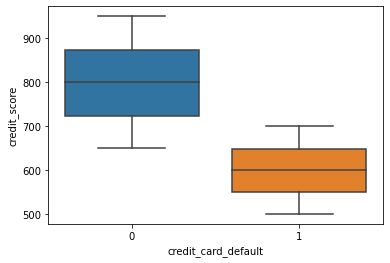

In [152]:
# Credit card default with credit score
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['credit_score'])

### - Those who have less credit score around 550 to 650 are at high risk to default

<AxesSubplot:xlabel='credit_card_default', ylabel='credit_limit_used(%)'>

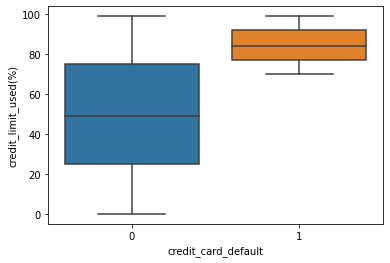

In [153]:
# Credit limit used
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['credit_limit_used(%)'])

### - Defaulters have used 68 to 85 percent of their credit limit

<AxesSubplot:xlabel='credit_card_default', ylabel='net_yearly_income'>

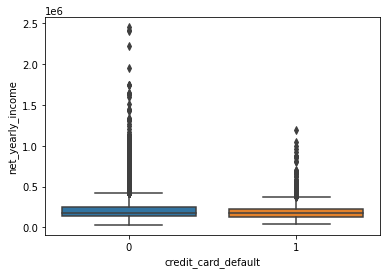

In [291]:
# Annual yearly income
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['net_yearly_income'])

### - People having high income are not defaulters

<AxesSubplot:xlabel='credit_card_default', ylabel='no_of_days_employed'>

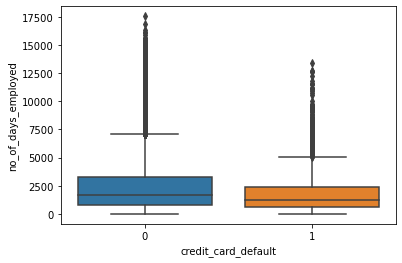

In [292]:
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['no_of_days_employed'])

### - Defaulters have unstable job


<AxesSubplot:xlabel='prev_defaults', ylabel='count'>

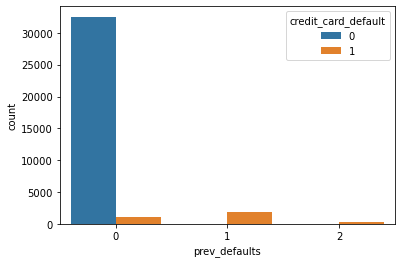

In [159]:
# Previous defaults
sns.countplot(x='prev_defaults',data=df_cleaned,hue='credit_card_default')

### - Defaulters have also defaulted previously 1 and 2 times

<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

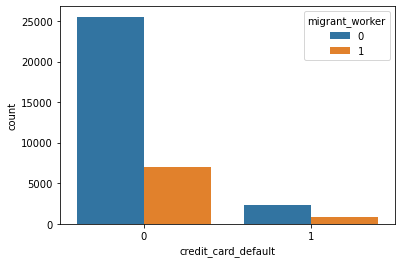

In [160]:
# Migrant Worker
sns.countplot(x='credit_card_default',data=df_cleaned,hue='migrant_worker')

In [161]:
# Table of migrant workers with respect to default
pd.crosstab(index=df_cleaned['credit_card_default'],columns=df_cleaned['migrant_worker'],margins=True,normalize='columns')

migrant_worker,0,1,All
credit_card_default,,,
0,0.916999,0.898309,0.912903
1,0.083001,0.101691,0.087097


### The graph doesn't give any significant relationship

<AxesSubplot:xlabel='default_in_last_6months', ylabel='count'>

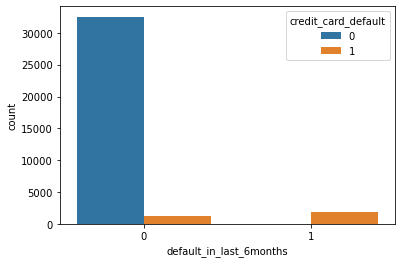

In [162]:
# Default in last 6 months
sns.countplot(x='default_in_last_6months',data=df_cleaned,hue='credit_card_default')

### Previous defaulters are at high risk

<AxesSubplot:xlabel='credit_card_default', ylabel='total_family_members'>

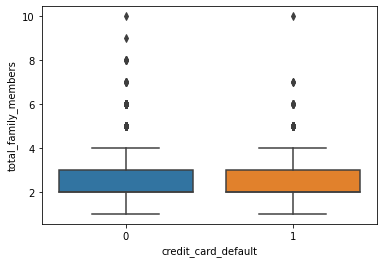

In [163]:
# Total family members
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['total_family_members'])

### There is no significant relationship between total family members with credit card default

<AxesSubplot:xlabel='owns_car', ylabel='count'>

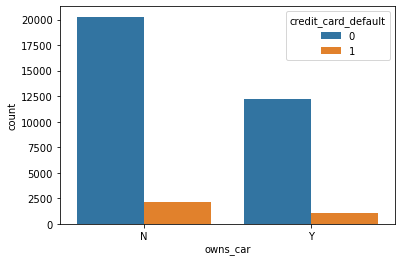

In [164]:
# owns car
sns.countplot(x='owns_car',data=df_cleaned,hue='credit_card_default')

### There is not a significant association between owning car vs dredit card default

<AxesSubplot:xlabel='owns_house', ylabel='count'>

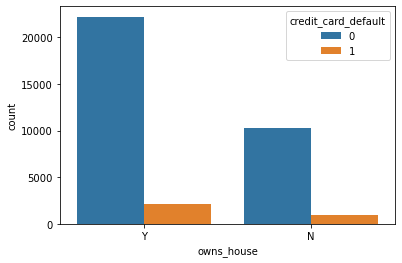

In [165]:
sns.countplot(x='owns_house',data=df_cleaned,hue='credit_card_default')

### There is no such association between owning house with default

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

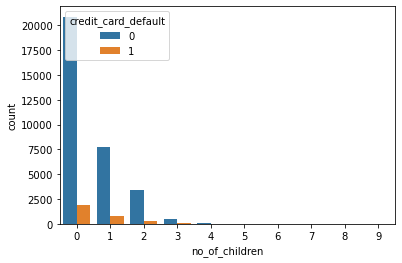

In [166]:
# Number of children
sns.countplot(x='no_of_children',data=df_cleaned,hue='credit_card_default')

### Peole who are alone tend to do more default

<AxesSubplot:xlabel='credit_card_default', ylabel='yearly_debt_payments'>

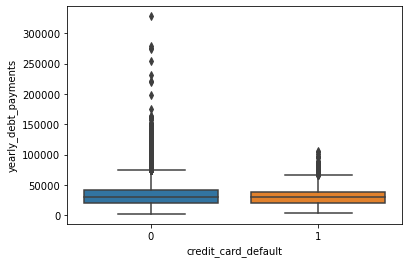

In [167]:
sns.boxplot(x=df_cleaned['credit_card_default'],y=df_cleaned['yearly_debt_payments'])

### Surprisingly, defaulters have taken less debt

<BarContainer object of 19 artists>

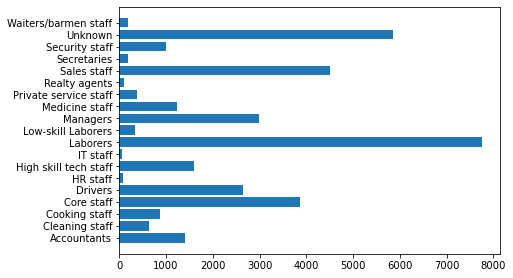

In [168]:
# Occupation counts
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
un,counts=np.unique(df_cleaned.occupation_type,return_counts=True)
plt.barh(un,counts)

In [169]:
pd.crosstab(index=df_cleaned['credit_card_default'],columns=df_cleaned['occupation_type'],margins=True,normalize='columns')

occupation_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff,All
credit_card_default,,,,,,,,,,,,,,,,,,,,
0,0.945351,0.895899,0.887209,0.940903,0.882732,0.909091,0.936717,0.968254,0.896,0.846154,0.932753,0.922575,0.930667,0.904255,0.902889,0.957895,0.895267,0.921616,0.890625,0.912903
1,0.054649,0.104101,0.112791,0.059097,0.117268,0.090909,0.063283,0.031746,0.104,0.153846,0.067247,0.077425,0.069333,0.095745,0.097111,0.042105,0.104733,0.078384,0.109375,0.087097


#### Low-skill Laborers, Waiters/barmen staff,security staff, cooking staff,drivers, Laborers are at high risk while IT staff, secretaries, Accountants are at low risk

## In conclusion 
- There are seven factors upon which credit card default depends
   1. Credit limit used
   2. credit_limit_used(%)	
   3. credit_score	
   4. prev_defaults	
   5. default_in_last_6months
   6. People who earn less 
   7. Selected professions

## Model Development

In [274]:
# Dropping customer_id , name columns
df_model=df_cleaned.drop(columns=['customer_id','name'])

In [275]:
df_model.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0,107934.04,612,Unknown,1,1,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0,109862.62,2771,Laborers,2,0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0,230153.17,204,Laborers,2,0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0,122325.82,11941,Core staff,2,0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0,387286.00,1459,Core staff,1,0,38282.95,52950.64,75,927.0,0,0,0


In [276]:
# assigning labels to categorical column
from sklearn import preprocessing
enc=preprocessing.LabelEncoder()
df_model.gender=enc.fit_transform(df_model.gender)
df_model.owns_car=enc.fit_transform(df_model.owns_car)
df_model.owns_house=enc.fit_transform(df_model.owns_house)
df_model.occupation_type=enc.fit_transform(df_model.occupation_type)
df_model.migrant_worker=enc.fit_transform(df_model.migrant_worker)
df_model.credit_card_default=enc.fit_transform(df_model.credit_card_default)



In [277]:
df_model.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0,107934.04,612,17,1,1,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0,109862.62,2771,8,2,0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0,230153.17,204,8,2,0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0,122325.82,11941,3,2,0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0,387286.00,1459,3,1,0,38282.95,52950.64,75,927.0,0,0,0


In [115]:
# Importing SMOTE library because it is an unbalanced dataset
from imblearn.over_sampling import SMOTE

In [278]:
# Assigning features and labels - features are input and labels are output
features, labels = SMOTE().fit_resample(df_model.drop(["credit_card_default"],axis=1), df_model.credit_card_default)

In [117]:
from sklearn.model_selection import train_test_split

In [279]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [281]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(rf.predict(x_test),y_test)

0.9849600982197667

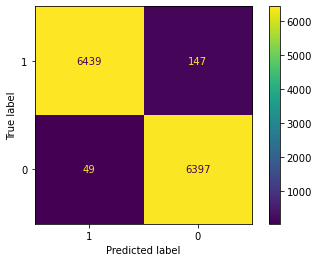

In [282]:
cm = confusion_matrix(y_test,rf.predict(x_test))
disp = ConfusionMatrixDisplay(cm, display_labels=["1","0"])
disp.plot()

In [287]:
from sklearn.metrics import  precision_score, recall_score


In [289]:
print("Precision       : {:.2f}%".format(precision_score(rf.predict(x_test),y_test)*100))
print("Recall          : {:.2f}%".format(recall_score(rf.predict(x_test),y_test)*100))

Precision       : 99.24%
Recall          : 97.75%
